<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_CursoPython/blob/main/Modulo2_Fundamentos_AI/ModelosNoSupervisados_solve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autores:** Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

**Institución:** Universidad de la Rioja

**Fecha:** Junio/2025




In [52]:
#!pip install scikit-learn
#!pip install matplotlib
#!pip install pandas
#!pip install pyclustering

In [53]:
# @title Librerías necesarias


# Algoritmos de clustering:
from sklearn.cluster import KMeans  # K-means tradicional
from sklearn.cluster import BisectingKMeans  # Versión divisiva de K-means

# Visualización de datos:
import matplotlib.pyplot as plt  # Biblioteca principal para gráficos

# Cómputo numérico y manejo de arrays:
import numpy as np  # Operaciones matemáticas eficientes

# Manejo de datos estructurados (tablas):
import pandas as pd  # Para DataFrames y análisis exploratorio

# Preprocesamiento de datos:
from sklearn.preprocessing import StandardScaler  # Estandarización (media=0, varianza=1)

# Clustering jerárquico:
from sklearn.cluster import AgglomerativeClustering  # Versión aglomerativa
from scipy.cluster.hierarchy import dendrogram, linkage  # Para dendrogramas y matriz de linkage

# Métricas de evaluación:
from sklearn.metrics import silhouette_score  # Calidad de clusters

# Reducción de dimensionalidad:
from sklearn.decomposition import PCA  # Análisis de Componentes Principales
# Importación de funciones específicas para cálculo de autovalores/autovectores
from numpy.linalg import eig  # Para descomposición espectral (usado en PCA)

# Utilidades adicionales:
from itertools import count  # Generador de contadores (útil para iteraciones)
from sklearn.metrics import confusion_matrix, classification_report  # Para matrices de confusión (clasificación)y el cálculo de las métricas


# CURSO - PYTHON: PROGRAMACIóN DE IA

**Módulo: Aprendizaje no supervisado**

En el aprendizaje supervisado, el sistema aprende a partir de ejemplos etiquetados, es decir, datos donde ya conocemos la respuesta correcta. El objetivo es construir un modelo que prediga etiquetas para nuevos datos. Por ejemplo: clasificar correos como "spam" o "no spam" usando ejemplos previamente etiquetados.

En cambio, en el *aprendizaje no supervisado*, el sistema trabaja con datos sin etiquetas y busca patrones ocultos por sí mismo. Aquí no hay respuestas correctas de antemano; el algoritmo explora la estructura intrínseca de los datos. Un ejemplo típico es agrupar clientes con comportamientos similares sin conocer previamente las categorías.

<center>
 <img src="https://raw.githubusercontent.com/ednavivianasegura/AccesoImages/aaa31fdeb3eb3a27d54280be8b9e45614b9a634a/clustering_diferencias.png" alt="descriptiva" width="50%" height="50%">  
</center>

Imagen tomada de  [Unsupervised Learning with Python: A Beginner's Guide, Vihar Kurama](https://builtin.com/data-science/unsupervised-learning-python)




**Objetivos:**

- Encontrar estructuras ocultas en los datos.

- Agrupar datos similares (clustering).

- Reducir la dimensionalidad para visualización o eficiencia.

**Aplicaciones:** Segmentación de clientes, detección de anomalías, compresión de imágenes, etc.



## Clustering

El clustering (o agrupamiento) es una técnica de aprendizaje no supervisado cuyo objetivo es dividir un conjunto de datos en grupos homogéneos (llamados clusters), de tal manera que se cumpla que:

* Los puntos dentro de un mismo cluster sean similares entre sí (minimizar varianza interna) *Intra-cluster*.

* Los puntos de clusters distintos sean diferentes (maximizar distancia entre clusters) *Inter-cluster*.

**Existen dos tipos de Clustering diferenciados por su estructura y forma de asignar clusters:**

* Jerárquico
* No jerárquico


### Clustering Jerárquico

Construye una jerarquía de clusters representada como un árbol (dendrograma), donde cada nodo es una fusión o división de clusters.

**Subtipos:**

* Aglomerativo (bottom-up): cada punto inicia como un cluster y se fusionan iterativamente.

* Divisivo (top-down): todos los puntos inician en un cluster y se dividen recursivamente.

**Ventaja:** No requiere especificar el número de clusters a priori.



**Ejemplo:**

Imaginemos que somos nutricionistas investigando la relación entre peso y estatura en un grupo de pacientes. Contamos con datos de 200 personas (peso en kg y estatura en cm), pero no tenemos información previa sobre categorías como *bajo peso*, *peso normal* o *sobrepeso*. Nuestro objetivo es descubrir si existen grupos naturales en estos datos que nos permitan identificar patrones relevantes para personalizar planes alimenticios.


Supongamos que los datos provienen de chequeos médicos rutinarios en una clínica de nutrición durante el último año.

Cada registro contiene:

* Peso (kg): Variable numérica continua

* Estatura (cm): Variable numérica continua

Actualmente, la clínica clasifica manualmente a los pacientes en tres categorías de peso según tablas de IMC (que relacionan peso y estatura), pero sospechamos que podrían existir subgrupos más específicos que requieran intervenciones diferenciadas.

* Utilizaremos clustering jerárquico y no jerárquico para identificar grupos naturales sin imponer categorías preconcebidas

* Visualizar cómo se relacionan las observaciones

* Determinar si las agrupaciones coinciden con las categorías tradicionales de IMC"



In [54]:
# =============================================
# 1. GENERACIÓN Y PREPARACIÓN DE DATOS
# =============================================

print("\n---------------------------------------------")
print('GENERACIÓN Y PREPARACIÓN DE DATOS')
print("---------------------------------------------")

# Semilla para reproducibilidad
np.random.seed(42)

# Grupo 1: personas más bajas y livianas
pesos_g1 = np.random.normal(loc=55, scale=6, size=80)     # Media 55 kg y desviación 6
estaturas_g1 = np.random.normal(loc=155, scale=6, size=80)  # Media 155 cm y desviación 6
grupo_g1 = np.full(80, 0)

# Grupo 2: personas de talla media
pesos_g2 = np.random.normal(loc=70, scale=5, size=70)     # Media 70 kg y desviación 5
estaturas_g2 = np.random.normal(loc=165, scale=5, size=70)  # Media 165 cm y desviación 5
grupo_g2 = np.full(70, 1)

# Grupo 3: personas más altas y pesadas
pesos_g3 = np.random.normal(loc=85, scale=3, size=50)     # Media 85 kg y desviación 3
estaturas_g3 = np.random.normal(loc=180, scale=3, size=50)  # Media 180 cm y desviación 3
grupo_g3 = np.full(50, 2)

# Concatenar todos los datos
pesos = np.concatenate([pesos_g1, pesos_g2, pesos_g3])
estaturas = np.concatenate([estaturas_g1, estaturas_g2, estaturas_g3])
grupos = np.concatenate([grupo_g1, grupo_g2, grupo_g3])

# Crear DataFrame Inicial
df_inicial = pd.DataFrame({
    'Peso': pesos,
    'Estatura': estaturas,
    'Grupo': grupos
})

# Combinar las dos variables en una matriz de 200x2
X = np.column_stack((pesos, estaturas))  # Cada fila es un paciente, columnas: [peso, estatura]
# np.column_stack (NumPy)tiene como propósito combinar arrays 1D o 2D de NumPy en una sola matriz 2D,
# apilándolos por columnas. Útil para unir variables numéricas antes de aplicar algoritmos de ML.
# Útil para crear una matriz numérica para algoritmos usando SCikit-learn

# ----------------------------------------------------------------------------------------------------------

# Escalado de datos (normalización)
scaler = StandardScaler()  # Crea un objeto para estandarizar (media=0, desviación=1)
X_scaled = scaler.fit_transform(X)  # Aplica la transformación a los datos


print(df_inicial.groupby('Grupo').agg({
    'Peso': ['mean', 'std'],      # Media y desviación estándar del peso
    'Estatura': ['mean', 'std', 'count']   # Media, desviación estándar de la estatura y conteo
}))


---------------------------------------------
GENERACIÓN Y PREPARACIÓN DE DATOS
---------------------------------------------
            Peso              Estatura                
            mean       std        mean       std count
Grupo                                                 
0      54.256959  5.744899  154.931820  5.505667    80
1      70.730702  5.117086  164.922992  5.236077    70
2      85.096544  2.321240  180.544497  2.953382    50



-------------------------------------------------------------
2. COMPARACIÓN: DATOS ORIGINALES VS ESCALADOS (Visualización)
---------------------------------------------------------------


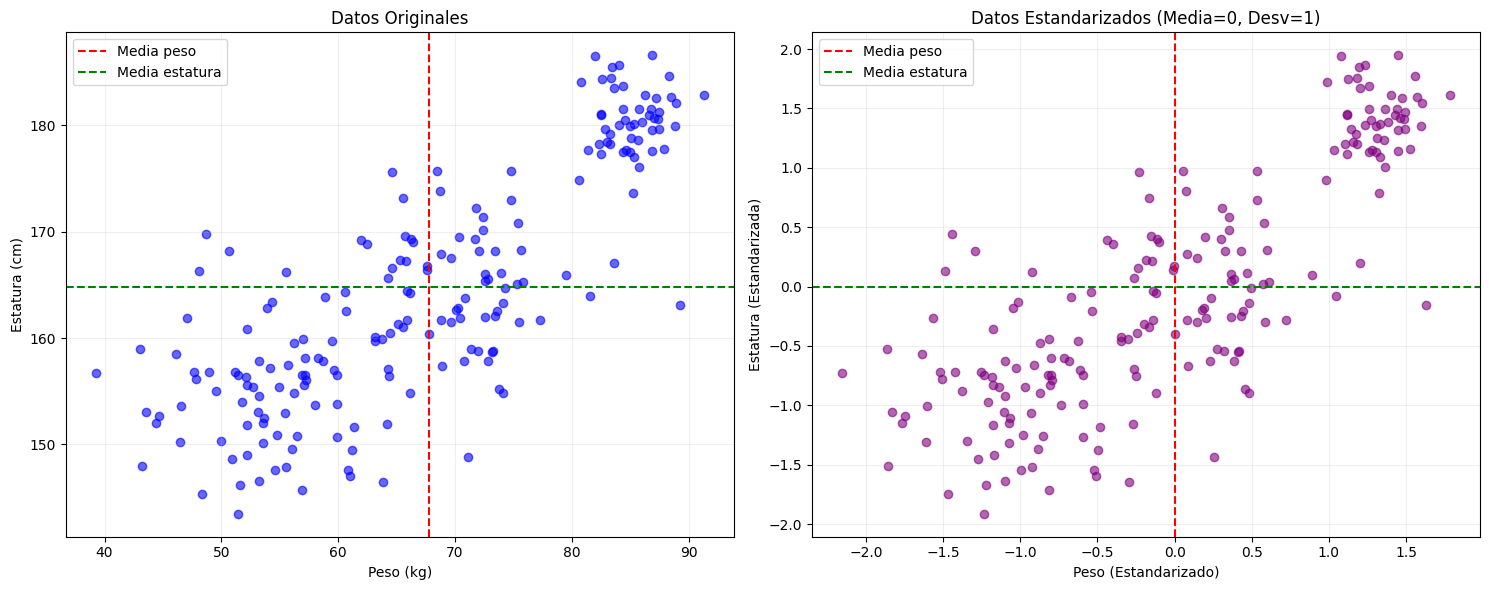

In [55]:
# =============================================
# 2. VISUALIZACIÓN DE DATOS
# =============================================

print("\n-------------------------------------------------------------")
print('2. COMPARACIÓN: DATOS ORIGINALES VS ESCALADOS (Visualización)')
print("---------------------------------------------------------------")

# Crear figura con 2 subplots (1 fila, 2 columnas)
plt.figure(figsize=(15, 6))  # Ajustar tamaño para dos gráficos

# ------------------------------------------
# Gráfico 1: Datos originales
# ------------------------------------------
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
plt.scatter(
    X[:, 0],  # Eje X: pesos originales
    X[:, 1],  # Eje Y: estaturas originales
    color='blue',
    alpha=0.6
)
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.title('Datos Originales')
plt.grid(True, alpha=0.2)

# Añadir líneas de media original
plt.axvline(x=np.mean(X[:, 0]), color='red', linestyle='--', label='Media peso')
plt.axhline(y=np.mean(X[:, 1]), color='green', linestyle='--', label='Media estatura')
plt.legend()

# ------------------------------------------
# Gráfico 2: Datos escalados
# ------------------------------------------
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
plt.scatter(
    X_scaled[:, 0],  # Eje X: pesos escalados
    X_scaled[:, 1],  # Eje Y: estaturas escaladas
    color='purple',
    alpha=0.6
)
plt.xlabel('Peso (Estandarizado)')
plt.ylabel('Estatura (Estandarizada)')
plt.title('Datos Estandarizados (Media=0, Desv=1)')
plt.grid(True, alpha=0.2)

# Añadir líneas en cero (medias después de escalar)
plt.axvline(x=0, color='red', linestyle='--', label='Media peso')
plt.axhline(y=0, color='green', linestyle='--', label='Media estatura')
plt.legend()

# Ajustar espacio entre subplots
plt.tight_layout()
plt.show()

In [56]:
# ==================================================
# 3. CLUSTERING JERÁRQUICO (AGGLOMERATIVE) INICIAL
# ==================================================

print("\n---------------------------------------------")
print('CLUSTERING JERÁRQUICO (AGGLOMERATIVE) INICIAL')
print("---------------------------------------------")


# Configuración del modelo
cluster_jerarquico = AgglomerativeClustering(
    #n_clusters= ,       # Por defecto 2 clusters
    metric='euclidean',  # Métrica de distancia entre puntos (distancia euclidiana)
    linkage='ward'       # Criterio para fusionar clusters:
    # linkage='ward': Minimiza la varianza de los clusters que se fusionan, produciendo clusters más compactos.
    # Alternativas comunes:
    #'complete': Usa la distancia máxima entre puntos.
    #'average': Usa la distancia promedio.
)

# Aplicar el clustering a los datos escalados
etiquetas_jer = cluster_jerarquico.fit_predict(X_scaled)  # Retorna un array con las etiquetas según el número
# de clusters creados (0 o 1)
print(etiquetas_jer)





---------------------------------------------
CLUSTERING JERÁRQUICO (AGGLOMERATIVE) INICIAL
---------------------------------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]



 ---------------------------------------------
VISUALIZACIÓN DE RESULTADOS POR CLUSTER
---------------------------------------------


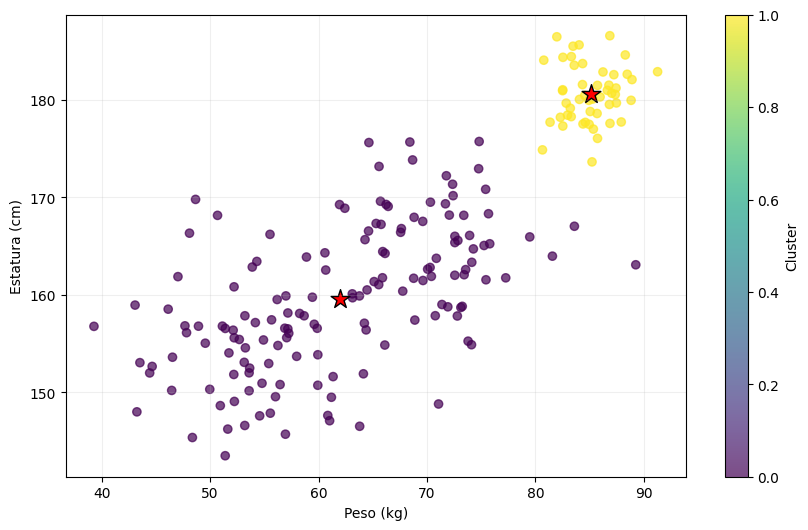

In [57]:
# =============================================
# 4. VISUALIZACIÓN DE RESULTADOS
# =============================================

print("\n ---------------------------------------------")
print('VISUALIZACIÓN DE RESULTADOS POR CLUSTER')
print("---------------------------------------------")

plt.figure(figsize=(10, 6))
# Graficar puntos coloreados por cluster
plt.scatter(
    X[:, 0],           # Peso en kg (eje X)
    X[:, 1],           # Estatura en cm (eje Y)
    c=etiquetas_jer,       # Color según etiqueta de cluster
    cmap='viridis',    # Mapa de colores
    alpha=0.7          # Transparencia para mejor visualización
)
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.colorbar(label='Cluster')  # Barra lateral que indica el mapeo de colores
plt.grid(True, alpha=0.2)

# Calcular y graficar centroides
for cluster_id in np.unique(etiquetas_jer):
    centroide = X[etiquetas_jer == cluster_id].mean(axis=0)  # Calcula la media de cada variable por cluster
    plt.scatter(
        centroide[0],          # Peso promedio del cluster
        centroide[1],          # Estatura promedio del cluster
        marker='*',            # Forma de estrella para el centroide
        s=200,                 # Tamaño del marcador
        c='red',               # Color rojo
        edgecolor='black'      # Borde negro para mejor contraste
    )
plt.show()



In [58]:
# =============================================
# 5. ANÁLISIS ESTADÍSTICO POR CLUSTER INICIAL
# =============================================

print("\n")
print('ANÁLISIS ESTADÍSTICO POR CLUSTER INICIAL (2)')
print()

# Convertir a DataFrame para análisis
df = df_inicial.copy()
df['Cluster'] = np.round(etiquetas_jer,0) # Añadir columna de clusters

print(df)

# Estadísticas descriptivas por cluster
tabla= df.groupby('Cluster').agg({
    'Peso': ['mean', 'std'],      # Media y desviación estándar del peso
    'Estatura': ['mean', 'std', 'count']   # Media, desviación estándar de la estatura y conteo
})
# Total de observaciones
total = len(df)

# Extraer el conteo desde la tabla (nivel de columna múltiple)
conteo = tabla[('Estatura', 'count')]

# Calcular proporción
proporcion = ((conteo / total).round(3))*100  # Redondear a 4 decimales

# Añadir como nueva columna
tabla[('Estatura', 'proporcion')] = proporcion

print(tabla)





ANÁLISIS ESTADÍSTICO POR CLUSTER INICIAL (2)

          Peso    Estatura  Grupo  Cluster
0    57.980285  153.681969      0        0
1    54.170414  157.142675      0        0
2    58.886131  163.867364      0        0
3    64.138179  151.890379      0        0
4    53.595080  150.149038      0        0
..         ...         ...    ...      ...
195  85.696150  178.592473      2        1
196  80.655747  174.860596      2        1
197  80.777609  184.061617      2        1
198  82.844667  179.656380      2        1
199  84.359659  183.713449      2        1

[200 rows x 4 columns]
              Peso              Estatura                           
              mean       std        mean       std count proporcion
Cluster                                                            
0        61.944706  9.880398  159.594367  7.333458   150       75.0
1        85.096544  2.321240  180.544497  2.953382    50       25.0



-------------------------------------------------
DENDROGRAMA (SELECCIÓN DE NÚMERO DE CLUSTERS)
-------------------------------------------------


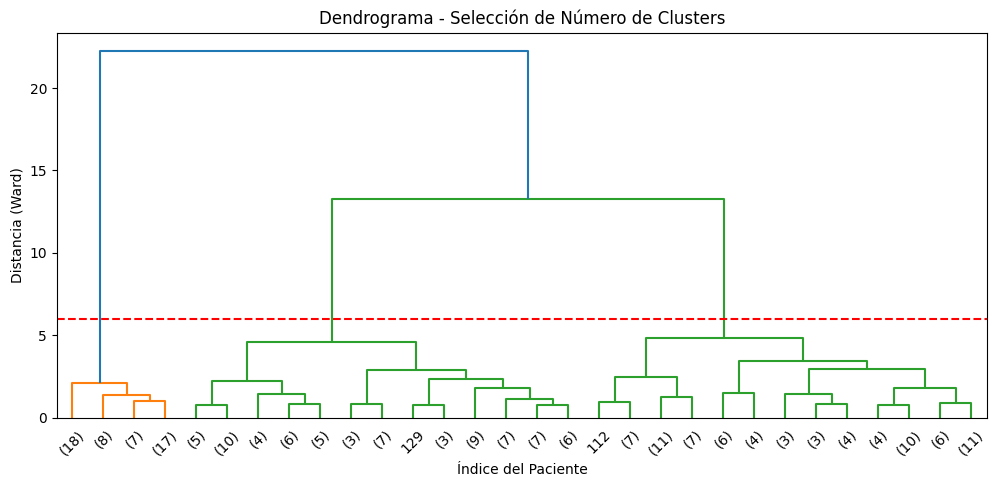

In [59]:
# =================================================
# 6. DENDROGRAMA (SELECCIÓN DE NÚMERO DE CLUSTERS)
# =================================================

print("\n-------------------------------------------------")
print('DENDROGRAMA (SELECCIÓN DE NÚMERO DE CLUSTERS)')
print("-------------------------------------------------")

# Calcular la matriz de linkage (pasos de fusión)
Z = linkage(
    X_scaled,          # Datos escalados
    method='ward'      # Mismo método que en el clustering
)

# Configurar el dendrograma
plt.figure(figsize=(12, 5))
dendrogram(
    Z,                          # Matriz de linkage
    truncate_mode='lastp',      # Mostrar solo los últimos p clusters fusionados
    p=30,                      # Número de clusters mostrados
    show_leaf_counts=True       # Mostrar conteo de hojas en cada rama
)
# Línea horizontal para sugerir número de clusters
plt.axhline(
    y=6,                     # Altura donde cortar el dendrograma
    color='r',                 # Color rojo
    linestyle='--'             # Línea discontinua
)
plt.title('Dendrograma - Selección de Número de Clusters')
plt.xlabel('Índice del Paciente')
plt.ylabel('Distancia (Ward)')  # Distancia entre clusters fusionados
plt.show()



In [60]:
# Establecer formato: redondear a 1 decimal y desactivar notación científica
np.set_printoptions(precision=3, suppress=True)

# Mostrar la matriz
print(Z)

[[150.    186.      0.008   2.   ]
 [100.    133.      0.014   2.   ]
 [159.    169.      0.022   2.   ]
 [ 17.     70.      0.022   2.   ]
 [ 89.    148.      0.023   2.   ]
 [ 96.    118.      0.023   2.   ]
 [ 91.    136.      0.023   2.   ]
 [166.    177.      0.027   2.   ]
 [128.    130.      0.029   2.   ]
 [183.    189.      0.029   2.   ]
 [154.    170.      0.029   2.   ]
 [ 28.     69.      0.029   2.   ]
 [138.    144.      0.034   2.   ]
 [108.    125.      0.035   2.   ]
 [ 65.    124.      0.036   2.   ]
 [  9.     53.      0.038   2.   ]
 [ 10.     51.      0.039   2.   ]
 [ 86.    135.      0.041   2.   ]
 [180.    202.      0.042   3.   ]
 [  7.     64.      0.042   2.   ]
 [ 80.     90.      0.043   2.   ]
 [ 82.    123.      0.043   2.   ]
 [ 27.     48.      0.043   2.   ]
 [  5.     21.      0.044   2.   ]
 [187.    193.      0.044   2.   ]
 [ 94.    115.      0.046   2.   ]
 [105.    142.      0.048   2.   ]
 [158.    171.      0.048   2.   ]
 [ 59.     67.      

¿Qué contiene la matriz de linkage? (**Matriz de enlaces**)

Es una matriz de forma (n−1)×4, donde n es el número de puntos. Cada fila representa una fusión y contiene:

- Índice del primer cluster/clase a fusionar
- Índice del segundo cluster/clase a fusionar
- Distancia entre los clusters fusionados (según el método elegido)
- Número de elementos (puntos) en el nuevo cluster resultante


**Explicación**

* Nosotros tenemos 200 puntos (observaciones individuales), cuyos índices van del 0 al 199.

* Cada vez que el algoritmo une dos puntos (o clusters), crea un nuevo cluster.

* A cada nuevo cluster se le asigna un índice consecutivo, comenzando desde n.

*Por ejemplo:*

n = 200, entonces el siguiente cluster (la fusión del primer par) se le asigna el índice 200, luego 201, 202, ..., y así sucesivamente.

Al final, en una agrupación jerárquica de n puntos, se necesitan exactamente n - 1 fusiones para unir todo en un único cluster. Por tanto, los índices llegarán hasta n + (n - 2) = 2n - 2.

Concreatmente, **n = 200**, por lo tanto: el último índice asignado será **2n - 2 = 398**.

El resultado de las últimas dos uniones, es decir, esa fusión es el cluster final que contiene los 200 elementos.

In [61]:
# ================================================
# 7. CLUSTERING JERÁRQUICO (AGGLOMERATIVE) Final
# ================================================

n_clust = 3

print("\n---------------------------------------------------------------------")
print(f'CLUSTERING JERÁRQUICO (AGGLOMERATIVE) final con {n_clust} clusters')
print("---------------------------------------------------------------------")


# Configuración del modelo
cluster_jerarquico = AgglomerativeClustering(
    n_clusters=n_clust,       # Número final de clusters a obtener
    metric='euclidean',
    linkage='ward'
)

# Aplicar el clustering a los datos escalados
etiquetas_jer = cluster_jerarquico.fit_predict(X_scaled)  # Retorna un array con las etiquetas de cluster (0, 1, 2)
print(etiquetas_jer)




---------------------------------------------------------------------
CLUSTERING JERÁRQUICO (AGGLOMERATIVE) final con 3 clusters
---------------------------------------------------------------------
[0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]



---------------------------------------------
VISUALIZACIÓN DE RESULTADOS FINALES
---------------------------------------------


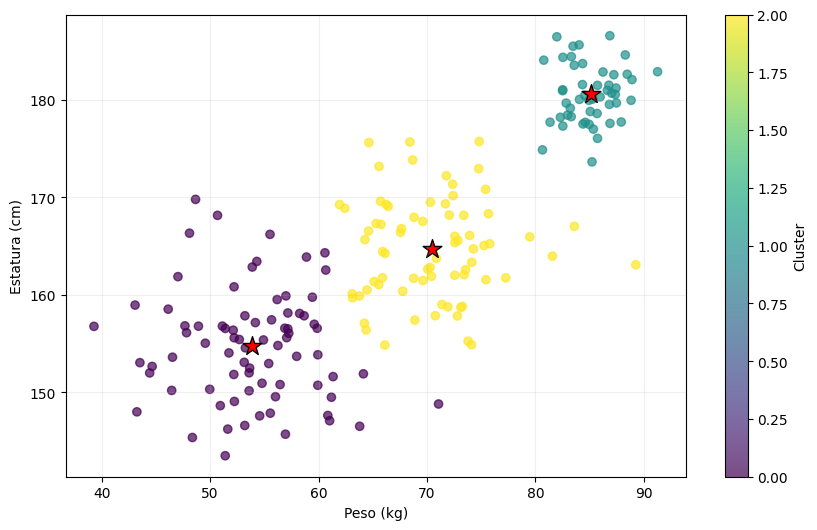

In [62]:
# =============================================
# 8. VISUALIZACIÓN DE RESULTADOS FINALES
# =============================================

print("\n---------------------------------------------")
print('VISUALIZACIÓN DE RESULTADOS FINALES')
print("---------------------------------------------")

plt.figure(figsize=(10, 6))
# Graficar puntos coloreados por cluster
plt.scatter(
    X[:, 0],           # Peso en kg (eje X)
    X[:, 1],           # Estatura en cm (eje Y)
    c=etiquetas_jer,       # Color según etiqueta de cluster
    cmap='viridis',    # Mapa de colores
    alpha=0.7          # Transparencia para mejor visualización
)
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.colorbar(label='Cluster')  # Barra lateral que indica el mapeo de colores
plt.grid(True, alpha=0.2)

# Calcular y graficar centroides
for cluster_id in np.unique(etiquetas_jer):
    centroide = X[etiquetas_jer == cluster_id].mean(axis=0)  # Calcula la media de cada variable por cluster
    plt.scatter(
        centroide[0],          # Peso promedio del cluster
        centroide[1],          # Estatura promedio del cluster
        marker='*',            # Forma de estrella para el centroide
        s=200,                 # Tamaño del marcador
        c='red',               # Color rojo
        edgecolor='black'      # Borde negro para mejor contraste
    )
plt.show()



In [63]:
# =============================================
# 9. ANÁLISIS ESTADÍSTICO POR CLUSTER
# =============================================

print("\n---------------------------------------------")
print('ANÁLISIS ESTADÍSTICO POR CLUSTER')
print("---------------------------------------------")

# Convertir a DataFrame para análisis
df = df_inicial.copy()
df['Cluster'] = etiquetas_jer  # Añadir columna de clusters


# Estadísticas descriptivas por cluster
tabla= df.groupby('Cluster').agg({
    'Peso': ['mean', 'std'],      # Media y desviación estándar del peso
    'Estatura': ['mean', 'std', 'count']   # Media, desviación estándar de la estatura y conteo
})
# Total de observaciones
total = len(df)

# Extraer el conteo desde la tabla (nivel de columna múltiple)
conteo = tabla[('Estatura', 'count')]

# Calcular proporción
proporcion = ((conteo / total).round(3))*100  # Redondear a 4 decimales

# Añadir como nueva columna
tabla[('Estatura', 'proporcion')] = proporcion

print(tabla)

print('\nCOMPARACIÓN CON LOS DATOS REALES')

print(df_inicial.groupby('Grupo').agg({
    'Peso': ['mean', 'std'],      # Media y desviación estándar del peso
    'Estatura': ['mean', 'std', 'count']   # Media, desviación estándar de la estatura y conteo
}))


print('\n MATRIZ DE CONFUSIÓN')
#Matriz de confusión
print(confusion_matrix(grupos, etiquetas_jer))






---------------------------------------------
ANÁLISIS ESTADÍSTICO POR CLUSTER
---------------------------------------------
              Peso              Estatura                           
              mean       std        mean       std count proporcion
Cluster                                                            
0        53.895434  5.613731  154.771140  5.652028    77       38.5
1        85.096544  2.321240  180.544497  2.953382    50       25.0
2        70.435033  5.136352  164.681881  5.143192    73       36.5

COMPARACIÓN CON LOS DATOS REALES
            Peso              Estatura                
            mean       std        mean       std count
Grupo                                                 
0      54.256959  5.744899  154.931820  5.505667    80
1      70.730702  5.117086  164.922992  5.236077    70
2      85.096544  2.321240  180.544497  2.953382    50

 MATRIZ DE CONFUSIÓN
[[75  0  5]
 [ 2  0 68]
 [ 0 50  0]]


In [64]:
# vemos que no coinciden los números de los grupos, por lo que modificamos:
mapeo = {
    1: 2,  # El cluster 1 del modelo pasa a ser categoría 2
    2: 1,  # El cluster 2 del modelo pasa a ser categoría 1
    0: 0   # El cluster 0 se mantiene igual
}

# Función de mapeo
def reemplazar_etiqueta(x):
    return mapeo.get(x, x)  # Si la etiqueta no está en el diccionario, la deja igual

# Aplicar el mapeo
etiquetas_corregidas = np.vectorize(reemplazar_etiqueta)(etiquetas_jer)
print("Matriz de confusión:")
print(confusion_matrix(grupos, etiquetas_corregidas))
print("\nReporte de clasificación:")
print(classification_report(grupos, etiquetas_corregidas))

Matriz de confusión:
[[75  5  0]
 [ 2 68  0]
 [ 0  0 50]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        80
           1       0.93      0.97      0.95        70
           2       1.00      1.00      1.00        50

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.96      0.97       200



### COMPARATIVA ENTRE CLUSTERING AGLOMERATIVO/NO AGLOMERATIVO

| Característica                   | Aglomerativo                               | Divisivo                                               |
| -------------------------------- | ------------------------------------------ | ------------------------------------------------------ |
| **Enfoque**                      | Bottom-up (de abajo hacia arriba)          | Top-down (de arriba hacia abajo)                       |
| **Proceso inicial**              | Cada punto es su propio clúster            | Todos los puntos están en un único clúster             |
| **Paso típico**                  | Se fusionan los dos clústeres más cercanos | Se divide el clúster en subconjuntos                   |
| **Técnica común**                | Enlace simple, completo, promedio, Ward    | Normalmente divisiones con k-means u otros heurísticos |
| **Computacionalmente más común** | Más utilizado.                             | Menos común en la práctica                           |
| **Complejidad computacional**    | O(n²) a O(n³) dependiendo del método       | Mayor si se buscan todas divisiones posibles           |
| **Dendrograma**                  | Se construye de abajo hacia arriba         | Se construye de arriba hacia abajo                     |
| **Ventaja principal**            | Fácil de implementar; bien soportado       | Puede capturar mejor la estructura global              |
| **Desventaja principal**         | Puede ser sensible al orden de los datos   | Más costoso computacionalmente                         |


### Clustering No Jerárquico

Asigna puntos a clusters directamente, sin estructura jerárquica. Los clusters son planos y definitivos.

**Algoritmos comunes:**

* **K-means: minimiza la varianza intra-cluster.**

* DBSCAN: basado en densidad y detección de outliers.

**Ventaja:** Computacionalmente eficiente para grandes conjuntos de datos.

**Cluster no jerárquico: K-Means**

**Objetivo:** Dividir datos en k grupos (clusters) donde cada punto pertenece al grupo con la media (centroide) más cercana.

**Pasos:**

* Seleccionar k centroides aleatorios.

* Asignar cada punto al centroide más cercano.

* Recalcular los centroides.

* Repetir hasta convergencia.

Ejercicio:

Teniendo en cuenta la base creada en el ejercicio anterior, realizar el agrupamiento de los pacientes utilizando el método **K-Means**

In [65]:
# --------------------------------------------
# 2. Aplicación de K-means
# --------------------------------------------

kmeans = KMeans(
    n_clusters=3,       # Número de clusters (k=3 como en el ejemplo jerárquico)
    init='k-means++',   # Método inteligente para inicializar centroides
    n_init=10,          # Número de inicializaciones diferentes (evita resultados subóptimos)
    max_iter=300,       # Máximo iteraciones por ejecución
    random_state=42     # Semilla para reproducibilidad
)
# n_clusters=3	Número de clusters (equivalente al usado en el jerárquico).
# init='k-means++'	Inicializa centroides lejanos entre sí para evitar malas convergencias.
# n_init=10	Ejecuta el algoritmo 10 veces con distintas inicializaciones y elige el mejor resultado.
# max_iter=300	Número máximo de iteraciones por ejecución.

# Entrenamiento y predicción
etiquetas_kmeans = kmeans.fit_predict(X_scaled)
centroides_kmeans = scaler.inverse_transform(kmeans.cluster_centers_)  # Centroides en escala original

print(centroides_kmeans)

print(etiquetas_kmeans)

[[ 53.407 154.492]
 [ 84.895 180.45 ]
 [ 69.976 164.284]]
[0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2
 0 0 0 0 0 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


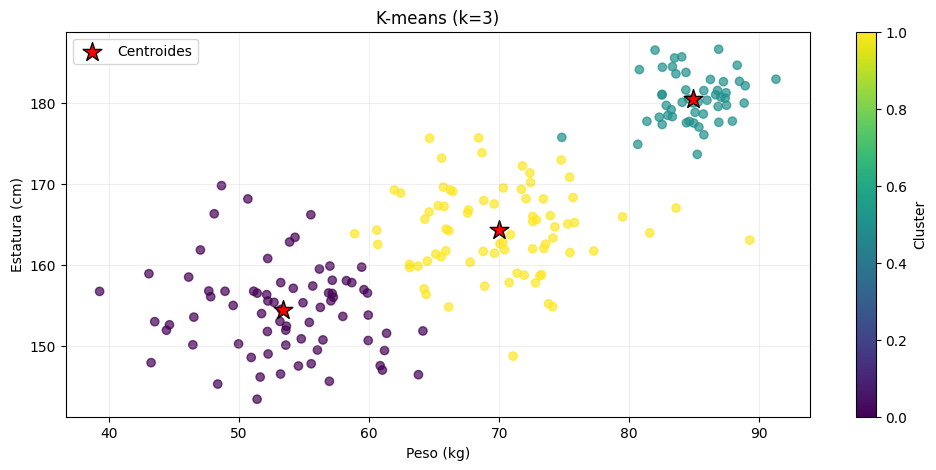

In [66]:
# --------------------------------------------
# 3. Visualización de resultados
# --------------------------------------------
plt.figure(figsize=(12, 5))

# Gráfico de K-means
plt.scatter(X[:, 0], X[:, 1], c=etiquetas_kmeans, cmap='viridis', alpha=0.7)
plt.scatter(centroides_kmeans[:, 0], centroides_kmeans[:, 1],
            marker='*', s=200, c='red', edgecolor='black', label='Centroides')
plt.xlabel('Peso (kg)')
plt.ylabel('Estatura (cm)')
plt.title('K-means (k=3)')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(alpha=0.2)




In [67]:
# =============================================
# 4. ANÁLISIS ESTADÍSTICO POR CLUSTER
# =============================================

print('\nANÁLISIS ESTADÍSTICO POR CLUSTER\n')

df_kmenas = df_inicial.copy()
df_kmenas['Cluster_kmeans'] = etiquetas_kmeans

# Estadísticas descriptivas por cluster
tabla_kmeans= df_kmenas.groupby('Cluster_kmeans').agg({
    'Peso': ['mean', 'std'],      # Media y desviación estándar del peso
    'Estatura': ['mean', 'std', 'count']   # Media, desviación estándar de la estatura y conteo
})
# Total de observaciones
total = len(df_kmenas)

# Extraer el conteo desde la tabla (nivel de columna múltiple)
conteo = tabla_kmeans[('Estatura', 'count')]

# Calcular proporción
proporcion = ((conteo / total).round(3))*100  # Redondear a 4 decimales

# Añadir como nueva columna
tabla_kmeans[('Estatura', 'proporcion')] = proporcion

print(tabla_kmeans)

print('\nCOMPARACIÓN CON LOS DATOS REALES')

print(df_inicial.groupby('Grupo').agg({
    'Peso': ['mean', 'std'],      # Media y desviación estándar del peso
    'Estatura': ['mean', 'std', 'count']   # Media, desviación estándar de la estatura y conteo
}))

print("\nMATRIZ DE CONFUSIÓN\n")
#Matriz de confusión
print(confusion_matrix(grupos, etiquetas_kmeans))



ANÁLISIS ESTADÍSTICO POR CLUSTER

                     Peso              Estatura                           
                     mean       std        mean       std count proporcion
Cluster_kmeans                                                            
0               53.407403  5.227054  154.491536  5.467840    73       36.5
1               84.894982  2.711528  180.449893  3.000743    51       25.5
2               69.975638  5.404323  164.283595  5.200691    76       38.0

COMPARACIÓN CON LOS DATOS REALES
            Peso              Estatura                
            mean       std        mean       std count
Grupo                                                 
0      54.256959  5.744899  154.931820  5.505667    80
1      70.730702  5.117086  164.922992  5.236077    70
2      85.096544  2.321240  180.544497  2.953382    50

MATRIZ DE CONFUSIÓN

[[73  0  7]
 [ 0  1 69]
 [ 0 50  0]]


In [68]:
# vemos que no coinciden los números de los grupos, por lo que modificamos:
mapeo = {
    1: 2,  # El cluster 1 del modelo pasa a ser categoría 2
    2: 1,  # El cluster 2 del modelo pasa a ser categoría 1
    0: 0   # El cluster 0 se mantiene igual
}

# Función de mapeo
def reemplazar_etiqueta(x):
    return mapeo.get(x, x)  # Si la etiqueta no está en el diccionario, la deja igual

# Aplicar el mapeo
etiquetas_corregidas = np.vectorize(reemplazar_etiqueta)(etiquetas_kmeans)
print("Matriz de confusión:")
print(confusion_matrix(grupos, etiquetas_corregidas))
print("\nReporte de clasificación:")
print(classification_report(grupos, etiquetas_corregidas))

Matriz de confusión:
[[73  7  0]
 [ 0 69  1]
 [ 0  0 50]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        80
           1       0.91      0.99      0.95        70
           2       0.98      1.00      0.99        50

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.96      0.96      0.96       200



### **Selección del Número Óptimo de Clusters**

En el aprendizaje no supervisado, específicamente en problemas de clustering, uno de los desafíos fundamentales es determinar el número adecuado de grupos (*k*) que existen naturalmente en los datos. A diferencia del aprendizaje supervisado, donde contamos con etiquetas que guían el proceso, en clustering debemos descubrir esta estructura oculta mediante métodos analíticos.

La elección incorrecta de *k* puede llevar a:
- **Sub-segmentación** (*k* demasiado bajo): Grupos heterogéneos que pierden patrones importantes.
- **Sobre-segmentación** (*k* demasiado alto): Grupos artificiales sin significado real, aumentando la complejidad del modelo.

Para abordar este problema, existen métodos cuantitativos y visuales que nos ayudan a tomar esta decisión de manera objetiva. Dos de las técnicas más utilizadas son:

1. **Método del Codo (Elbow Method)**: Un enfoque visual que analiza cómo mejora la cohesión de los clusters al aumentar *k*.
2. **Silhouette Score**: Una medida cuantitativa que evalúa tanto la cohesión interna como la separación entre clusters.

En el contexto de nuestro estudio con datos de peso y estatura, aplicaremos estos métodos para identificar cuántos grupos naturales de pacientes existen según sus características antropométricas, información valiosa para personalizar tratamientos o recomendaciones de salud. A continuación, exploraremos en detalle cada uno de estos métodos.

1. Método del Codo (Elbow Method) tiene como objetivo determinar el número óptimo de clusters (k) en algoritmos como K-means, evaluando la relación entre la varianza intra-cluster y el número de clusters.

En primer lugar, la inercia (Suma de Cuadrados Intra-Cluster, WCSS) es la medida de cohesión que calcula la suma de las distancias al cuadrado entre cada punto y su centroide.
Al incrementar k, la inercia disminuye (cada cluster es más compacto). El punto óptimo se encuentra donde la reducción de inercia comienza a ser marginal (forma de "codo" en la curva).

2. Silhouette Score tiene como objetivo evaluar la calidad de los clusters midiendo cuán bien separados están y cuán cohesionados internamente.

Para cada punto xi:

* Distancia intra-cluster (ai): promedio de distancias entre xi y todos los puntos en su mismo cluster.

* Distancia inter-cluster (bi): promedio de distancias entre xi y todos los puntos en el cluster más cercano (distinto al suyo).

si∈[−1,1]:

* Cercano a 1: El punto está bien asignado (lejos de clusters vecinos).

+ Cercano a 0: El punto está en la frontera entre clusters.

+ Cercano a -1: El punto está mal asignado (más cerca de otro cluster).

El Silhouette Score global es el promedio de si para todos los puntos.

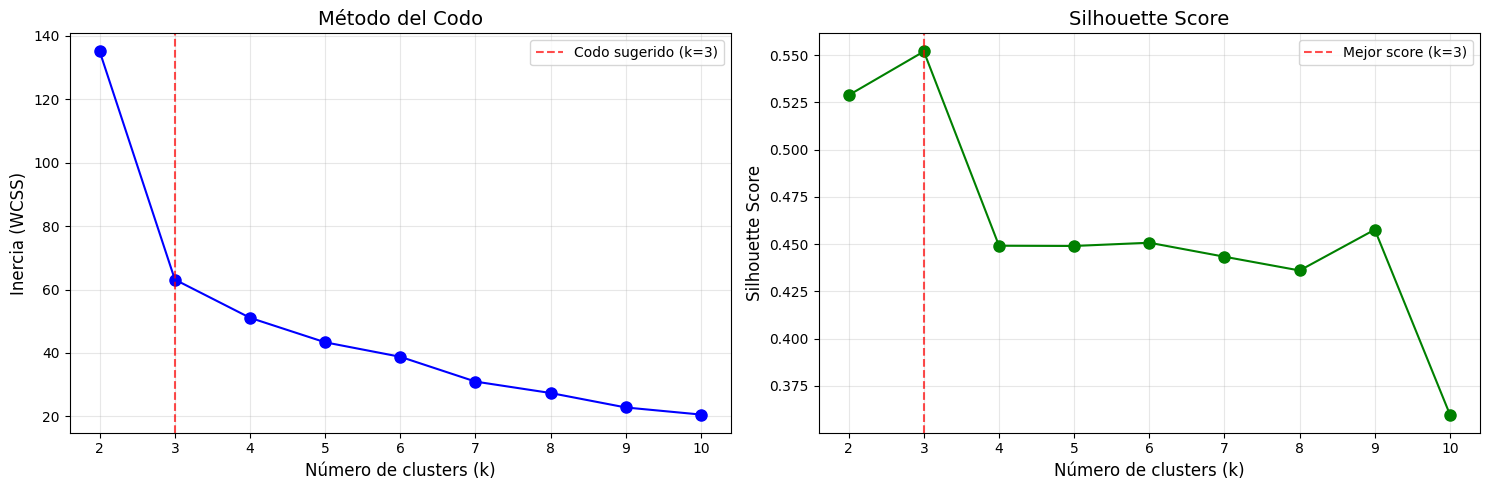

In [69]:
# =============================================
# Configuración de rango de k's a evaluar
# =============================================

k_range = range(2, 11)  # Creamos un rango de valores para k (número de clusters) desde 2 hasta 10


# =============================================
# Cálculo de métricas
# =============================================

inercias = []          # Lista para almacenar la inercia (WCSS) para cada k
silhouette_scores = []  # Lista para almacenar los puntajes de silueta para cada k

for k in k_range:
    # Inicializamos KMeans con:
    # - n_clusters=k: número de clusters a formar
    # - random_state=42: semilla para reproducibilidad
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Ajustamos el modelo y predecimos las etiquetas de cluster
    etiquetas = kmeans.fit_predict(X_scaled)

    # Almacenamos la inercia (suma de distancias al cuadrado intra-cluster)
    inercias.append(kmeans.inertia_)  # WCSS

    # Calculamos y almacenamos el silhouette score para este k
    # - X_scaled: datos estandarizados
    # - etiquetas: asignaciones de cluster predichas
    silhouette_scores.append(silhouette_score(X_scaled, etiquetas))

# Creamos una figura de 15x5 pulgadas para los subplots
plt.figure(figsize=(15, 5))

# =============================================
# Gráfico del Método del Codo (subplot izquierdo)
# =============================================
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1

# Graficamos la curva del codo:
# - k_range en eje X, inercias en eje Y
# - 'bo-': puntos azules con línea continua
# - markersize=8: tamaño de los puntos
plt.plot(k_range, inercias, 'bo-', markersize=8)

# Línea vertical roja punteada para marcar el codo sugerido
plt.axvline(x=3, color='r', linestyle='--', alpha=0.7, label='Codo sugerido (k=3)')

# Etiquetas y título
plt.xlabel('Número de clusters (k)', fontsize=12)
plt.ylabel('Inercia (WCSS)', fontsize=12)
plt.title('Método del Codo', fontsize=14)

# Configuramos ticks en el eje X para que coincidan con los valores de k probados
plt.xticks(k_range)

# Añadimos una cuadrícula semitransparente
plt.grid(alpha=0.3)

# Mostramos la leyenda
plt.legend()

# =============================================
# Gráfico del Silhouette Score (subplot derecho)
# =============================================
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2

# Graficamos los silhouette scores:
# - k_range en eje X, silhouette_scores en eje Y
# - 'go-': puntos verdes con línea continua
plt.plot(k_range, silhouette_scores, 'go-', markersize=8)

# Línea vertical roja punteada para marcar el mejor score
plt.axvline(x=3, color='r', linestyle='--', alpha=0.7, label='Mejor score (k=3)')

# Etiquetas y título
plt.xlabel('Número de clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score', fontsize=14)

# Configuramos ticks en el eje X
plt.xticks(k_range)

# Añadimos cuadrícula
plt.grid(alpha=0.3)

# Mostramos la leyenda
plt.legend()

# Ajustamos el layout para que no se solapen los elementos
plt.tight_layout()

# Mostramos la figura con ambos gráficos
plt.show()

## Análisis de componentes principales (PCA)

El Análisis de Componentes Principales (PCA) es una técnica fundamental de reducción de dimensionalidad en el aprendizaje automático y la estadística. Su objetivo es transformar un conjunto de variables correlacionadas en un nuevo conjunto de variables no correlacionadas llamadas componentes principales, ordenadas por la cantidad de varianza que explican en los datos originales.

¿Por qué usar PCA?
* Simplificar datos complejos: reduce el número de variables manteniendo la mayor información posible.

* Visualizar datos multidimensionales: permite proyectar datos en 2D o 3D para su exploración visual.

* Eliminar ruido y redundancia: Los componentes menos importantes suelen capturar ruido o información repetida.


**Aplicación en el Ejemplo de Peso y Estatura**

Para nuestros datos de pacientes:

Variables originales: Peso (kg) y Estatura (cm).

Problema: Aunque solo son 2 variables, PCA nos ayuda a:

Entender cuál variable contribuye más a la variabilidad.

Reducir a 1 componente si ambas están altamente correlacionadas.


In [70]:
# Datos estandarizados en dataframe:
datos_scaled = pd.DataFrame(X_scaled,
                     columns=["peso", "estatura"])


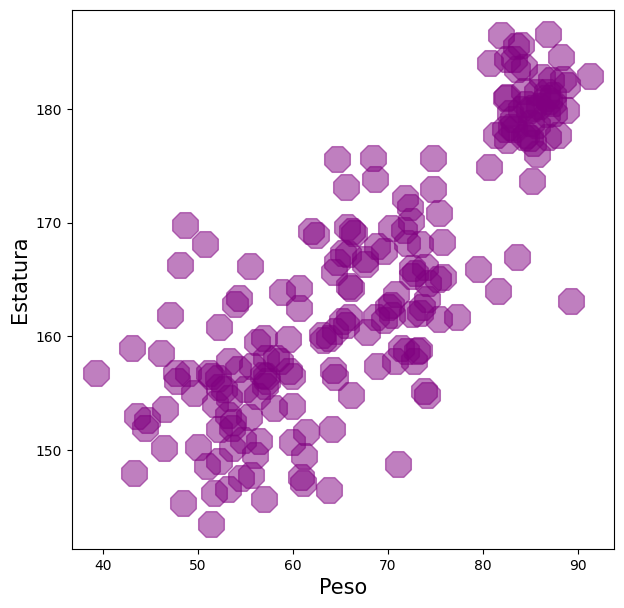

In [71]:
# =============================================
# 1. Visualización de datos
# =============================================
# Código de visualización datos originales
plt.figure(figsize=(7, 7))
plt.scatter(df_inicial["Peso"], df_inicial["Estatura"],
            marker="8", s=400, color="purple", alpha=0.5)
plt.xlabel("Peso", fontsize=15)
plt.ylabel("Estatura", fontsize=15)
plt.show()

**Matriz de covarianza**

La covarianza es una medida de la variación conjunta de dos variables aleatorias, indicando si tienden a variar en la misma dirección (covarianza positiva) o en direcciones opuestas (covarianza negativa).

          0         1
0  1.005025  0.823978
1  0.823978  1.005025


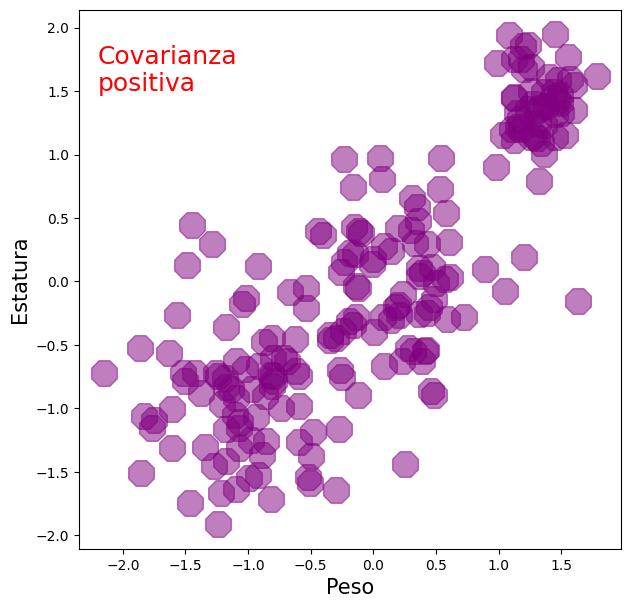

In [72]:
# =============================================
# 2. Código de visualización datos escalados y la matriz de covarianzas
# =============================================

print(pd.DataFrame(X_scaled).cov())

plt.figure(figsize=(7, 7))
plt.scatter(datos_scaled["peso"], datos_scaled["estatura"],
            marker="8", s=400, color="purple", alpha=0.5)
plt.xlabel("Peso", fontsize=15)
plt.ylabel("Estatura", fontsize=15)
plt.text(-2.2, 1.5, "Covarianza\npositiva", fontsize=18, color="red")
plt.show()

Eigenvector Rojo: [-0.707  0.707] Eigenvalor: 0.18104755263082473
Eigenvector Azul: [0.707 0.707] Eigenvalor: 1.8290026986254575


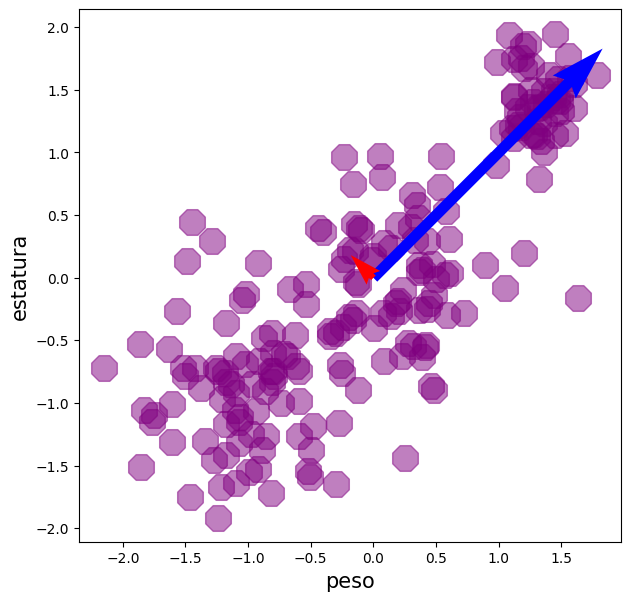

In [73]:
# =============================================
# 3. Cálculo de eigenvalores y eigenvectores
# =============================================

valores, vectores = eig(datos_scaled.cov())

vector_azul = vectores[:, 0]
vector_rojo = vectores[:, 1]

print("Eigenvector Rojo:", vector_rojo, "Eigenvalor:", valores[1])
print("Eigenvector Azul:", vector_azul, "Eigenvalor:", valores[0])

# Código de visualización

plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")

# Graficando los datos
plt.scatter(datos_scaled["peso"], datos_scaled["estatura"],
            marker="8", s=400, color="purple", alpha=0.5)

# Graficando los eigenvectores
plt.quiver(0, 0,
           vector_azul[0]/abs(vector_azul[0])*valores[0],
           vector_azul[1]/abs(vector_azul[1])*valores[0],
           color="blue", angles="xy", scale_units="xy", scale=1, width=0.02)

plt.quiver(0, 0,
           vector_rojo[0]/abs(vector_rojo[0])*valores[1],
           vector_rojo[1]/abs(vector_rojo[1])*valores[1],
           color="red", angles="xy", scale_units="xy", scale=1, width=0.02)

plt.xlabel("peso", fontsize=15)
plt.ylabel("estatura", fontsize=15)
plt.show()

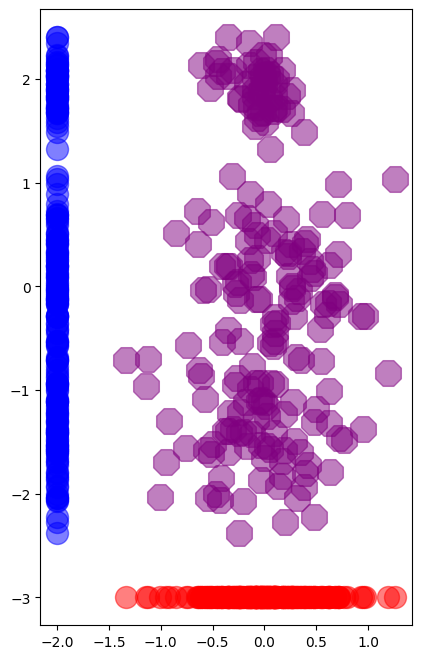

In [74]:
# =============================================
# 4. Datos proyectados (nuevos ejes)
# =============================================

proyectados = pd.DataFrame(datos_scaled.values @ vectores.T,
                          columns=["peso", "estatura"])

# Código de visualización
plt.figure(figsize=(8, 8))
plt.axes().set_aspect("equal")

# Datos rotados
plt.scatter(proyectados["peso"], proyectados["estatura"],
            marker="8", s=400, color="purple", alpha=0.5)

# Proyección de los datos en 1 dimensión
plt.scatter(proyectados["peso"], [-3]*len(proyectados["estatura"]),
            s=250, color="red", alpha=0.5)

plt.scatter([-2]*len(proyectados["estatura"]), proyectados["estatura"],
            s=250, color="blue", alpha=0.5)
plt.show()

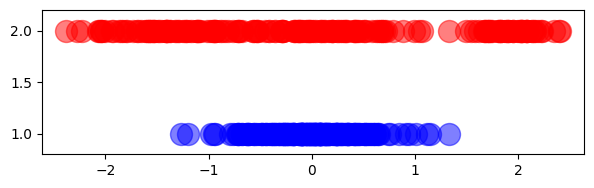

Varianza explicada por cada componente: [1.829 0.181]
Proporción de varianza explicada por cada componente: [0.91 0.09]


In [75]:
# =============================================
# 4. Obtención de componentes principales
# =============================================

pca = PCA()
datos_scaled2 = pca.fit_transform(datos_scaled)

# Código de visualización
plt.figure(figsize=(7, 7))
plt.axes().set_aspect("equal")
plt.scatter(datos_scaled2[:, 0], [2]*datos_scaled2[:, 0].size, s=250, color="red", alpha=0.5)
plt.scatter(datos_scaled2[:, 1], [1]*datos_scaled2[:, 1].size, s=250, color="blue", alpha=0.5)
plt.ylim((0.8, 2.2))
plt.show()
print("Varianza explicada por cada componente:", pca.explained_variance_)
print("Proporción de varianza explicada por cada componente:", pca.explained_variance_ratio_)

### Interpretación de la primera componente principal (PC1)

La primera componente principal (PC1) representa la **dirección de máxima varianza** en el conjunto de datos. En este caso, explica el **91 % de la varianza total**, lo que significa que **una sola dimensión puede resumir la mayor parte de la información contenida en las variables peso y estatura**.

Matemáticamente, PC1 es una **combinación lineal** de las variables estandarizadas:

$$
\text{PC1} = a_1 \cdot \text{peso (escalado)} + a_2 \cdot \text{estatura (escalada)}
$$

Por ejemplo, si:

$$
a_1 \approx 0.71 \quad \text{y} \quad a_2 \approx 0.71
$$

entonces:

$$
\text{PC1} = 0.71 \cdot \text{peso (escalado)} + 0.71 \cdot \text{estatura (escalada)}
$$

Esto significa que **PC1 captura una medida de "tamaño corporal general"**, ya que da pesos positivos similares tanto al peso como a la estatura.

En términos prácticos:

- Valores altos de PC1 indican personas **más grandes** (más altas y pesadas).
- Valores bajos de PC1 indican personas **más pequeñas** (más bajas y livianas).

Esto justifica que, al proyectar los datos sobre esta componente, obtengamos una representación más compacta sin perder gran parte de la información original.


### Interpretación de la segunda componente principal (PC2)

La segunda componente principal (PC2) es ortogonal a la primera y representa la **dirección de variación residual**, es decir, lo que no fue explicado por la PC1. Esta componente explica apenas el 9 % de la variabilidad total del conjunto de datos.

Matemáticamente, PC2 también es una combinación lineal de las variables estandarizadas:

$$
\text{PC2} = b_1 \cdot \text{peso (escalado)} + b_2 \cdot \text{estatura (escalada)}
$$

Por ejemplo, si:

$$
b_1 \approx -0.71 \quad \text{y} \quad b_2 \approx 0.71
$$

entonces:

$$
\text{PC2} = -0.71 \cdot \text{peso (escalado)} + 0.71 \cdot \text{estatura (escalada)}
$$

Este tipo de combinación sugiere que PC2 refleja una **diferencia o contraposición** entre estatura y peso. En términos prácticos:

- Un valor alto de PC2 indica que la persona es **alta y liviana** en comparación con el promedio.
- Un valor bajo de PC2 indica que la persona es **baja y pesada**.

Dado que esta componente explica una proporción pequeña de la varianza (9 %), su utilidad principal es para observar **variaciones atípicas o específicas** en la relación entre peso y estatura que no se explican por el tamaño general del cuerpo (PC1).


# Actividad

Teniendo en cuenta el dataset de diabetes trabajado anteriormente, realiza el agrupamiento por medio de clustering (tanto aglomerativo como k-means)

In [76]:
# Cargar la base de datos
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Embarazos', 'Glucosa', 'Presion', 'Piel', 'Insulina', 'IMC', 'Pedigri', 'Edad', 'Resultado']
data = pd.read_csv(url, header=None, names=columns)


1. Cluster jerárquico

In [77]:
# Separar características y etiqueta real
X = data.drop('Resultado', axis=1)
y = data['Resultado']  # Etiquetas reales (0: No diabetes, 1: Diabetes)

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
# Versión compatible con scikit-learn >=1.4
cluster_jerarquico = AgglomerativeClustering(
    n_clusters=2,
    metric='euclidean',  # Parámetro actualizado
    linkage='ward'
)

etiquetas_jer = cluster_jerarquico.fit_predict(X_scaled)

In [80]:
# Configurar K-means
kmeans = KMeans(
    n_clusters=2,          # 2 grupos
    random_state=42        # Semilla para reproducibilidad
)

# Entrenar y predecir
etiquetas_kmeans = kmeans.fit_predict(X_scaled)

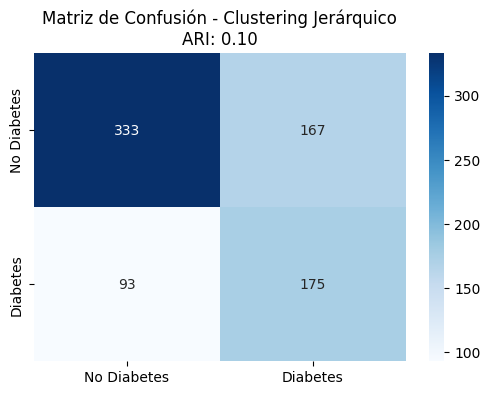

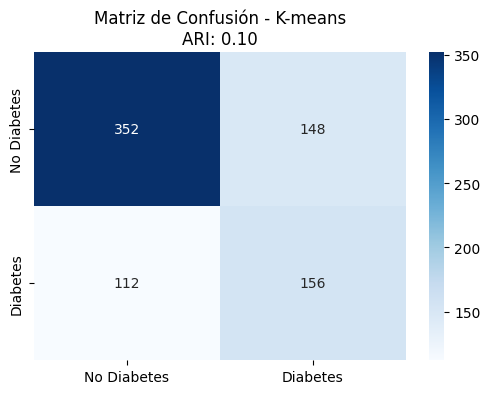

In [83]:
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
# Función para evaluar coincidencia con etiquetas reales
def evaluar_clusters(etiquetas_pred, y_real, metodo):
    # Matriz de confusión
    cm = confusion_matrix(y_real, etiquetas_pred)

    # Ajustar etiquetas si es necesario (K-means/jerárquico pueden invertir 0/1)
    if cm[0, 0] + cm[1, 1] < cm[0, 1] + cm[1, 0]:
        etiquetas_pred = 1 - etiquetas_pred  # Invertir etiquetas
        cm = confusion_matrix(y_real, etiquetas_pred)

    # Métricas
    ari = adjusted_rand_score(y_real, etiquetas_pred)  # Adjusted Rand Index

    # Visualización
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Matriz de Confusión - {metodo}\nARI: {ari:.2f}')
    plt.show()

# Evaluar ambos métodos
evaluar_clusters(etiquetas_jer, y, 'Clustering Jerárquico')
evaluar_clusters(etiquetas_kmeans, y, 'K-means')

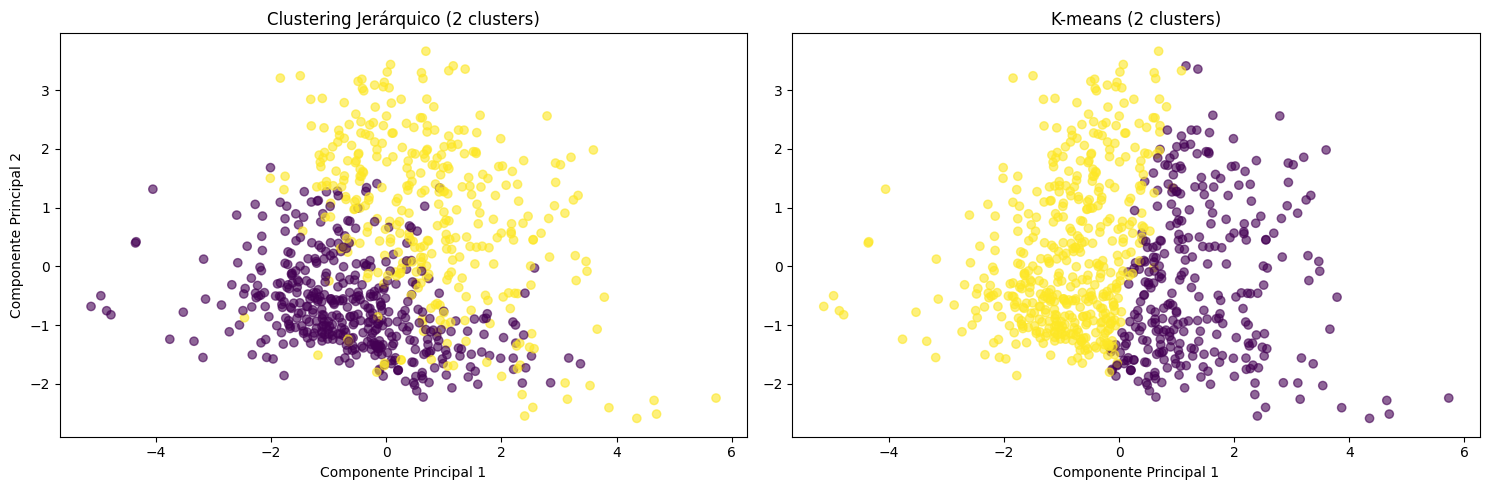

In [84]:
# Reducir a 2D para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Gráfico comparativo
plt.figure(figsize=(15, 5))

# Clustering Jerárquico
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas_jer, cmap='viridis', alpha=0.6)
plt.title('Clustering Jerárquico (2 clusters)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# K-means
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas_kmeans, cmap='viridis', alpha=0.6)
plt.title('K-means (2 clusters)')
plt.xlabel('Componente Principal 1')

plt.tight_layout()
plt.show()